<h4>Importação e pré processamentos dos dados</h4>

In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the 'c:\users\sansa\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\sansa\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28


You should consider upgrading via the 'c:\users\sansa\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
Matplotlib is building the font cache; this may take a moment.


In [3]:
#importando arquivo de reclamações
reclamacoes = pd.read_csv("dados-gerais-das-reclamacoes-por-operadora.csv",sep=",",delimiter=";",encoding='latin-1')

In [4]:
#corrigindo tipos de dados
para_datetime = ['Data Atendimento','Data de Atualização']
for coluna in para_datetime:
    reclamacoes[coluna] = pd.to_datetime(reclamacoes[coluna],format='%d/%m/%Y %H:%M:%S')

In [5]:
#criando novas colunas

DIAS = [
'Segunda-feira',
'Terça-feira',
'Quarta-feira',
'Quinta-Feira',
'Sexta-feira',
'Sábado',
'Domingo'
]

#inclusão de coluna dia da semana
reclamacoes['dia_semana'] = [DIAS[x.weekday()] for x in reclamacoes['Data Atendimento']]

MESES = [
'Janeiro',
'Fevereiro',
'Março',
'Abril',
'Maio',
'Junho',
'Julho',
'Agosto',
'Setembro',
'Outubro',
'Novembro',
'Dezembro'
]

#inclusão de coluna mês do ano
reclamacoes['mês_extenso'] = [MESES[x.month - 1] for x in reclamacoes['Data Atendimento']]
reclamacoes['mês'] = [x.month for x in reclamacoes['Data Atendimento']]
reclamacoes['mês'] = [str(x) if int(x) >= 10 else "0" + str(x) for x in reclamacoes['mês']]

#inclusão de coluna dia
reclamacoes['dia'] = [x.day for x in reclamacoes['Data Atendimento']]

#inclusão de coluna ano
reclamacoes['ano'] = [x.year for x in reclamacoes['Data Atendimento']]

#inclusão de coluna mês/ano
ano_mes = []
for x in reclamacoes[['ano','mês']].values:
    ano_mes.append(str(x[0]) + "-" + x[1])
reclamacoes['mês-ano'] = ano_mes

#inclusão quizena do mês
reclamacoes['quinzena'] = [1 if dia <= 15 else 2 for dia in reclamacoes['dia']]

#inclusao ordem da semana no mês (1ª,2ª,etc)
partes_semana = []

for dia in reclamacoes['dia']:
    if dia <=7:
        partes_semana.append(1)
    elif dia > 7 and dia <=14:
        partes_semana.append(2)
    elif dia > 14 and dia <=21:
        partes_semana.append(3)
    elif dia > 21 and dia <=28:
        partes_semana.append(4)
    elif dia > 28 and dia <=31:
        partes_semana.append(5)
        
reclamacoes['parte_semana'] = partes_semana

#inclusao da data sem horário
reclamacoes['Data'] = reclamacoes['Data Atendimento'].dt.date
reclamacoes['Data'] = ["%s-%s-%s" % (str(data).split('-')[2],str(data).split('-')[1],str(data).split('-')[0]) for data in reclamacoes['Data'].values]

#inclusao da hora em que ocorreu a reclamação
reclamacoes['Hora'] = reclamacoes['Data Atendimento'].dt.hour

In [6]:
#Criando função para inclusão dos valores das barras em gráficos com o Seaborn

import numpy as np
def show_values_on_bars(axs, h_v="v", space=0.4, align=1.5):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + (p.get_height()/align)
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

<h4>Qual o status atuais das reclamações?<h4>

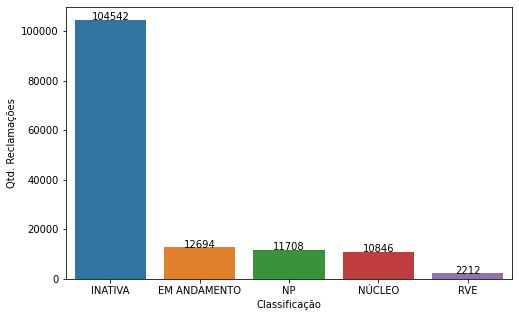

In [7]:
#Ranking de reclamações por classificação

reclamacoes_por_clasificacao = reclamacoes['Classificação'].value_counts().reset_index()

reclamacoes_por_clasificacao.columns = ['Classificação', 'Qtd. Reclamações']

plt.figure(figsize=(8,5))
ax = sns.barplot(x="Classificação", y='Qtd. Reclamações', data=reclamacoes_por_clasificacao)
show_values_on_bars(ax, "v", 0.3, 1.4)

<h4>Quais naturezas de reclamações mais ocorrem?<h4>

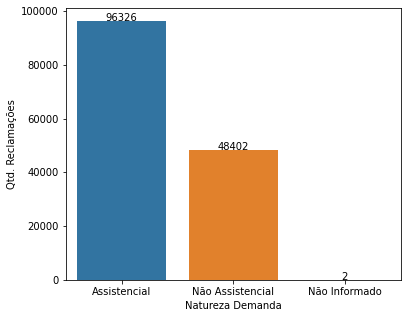

In [8]:
#Ranking de reclamações por natureza
reclamacoes_por_natureza = reclamacoes['Natureza Demanda'].value_counts().reset_index()

reclamacoes_por_natureza.columns = ['Natureza Demanda', 'Qtd. Reclamações']

plt.figure(figsize=(6,5))
ax = sns.barplot(x="Natureza Demanda", y='Qtd. Reclamações', data=reclamacoes_por_natureza)
show_values_on_bars(ax, "v", 0.3, 1.4)

<h4>A quantidade de reclamações está aumentando ou diminuindo?</h4>
<h5>É possível identificar um tendência de alta na quantidade de reclamações nos últimos 3 meses do período observado.</h5>

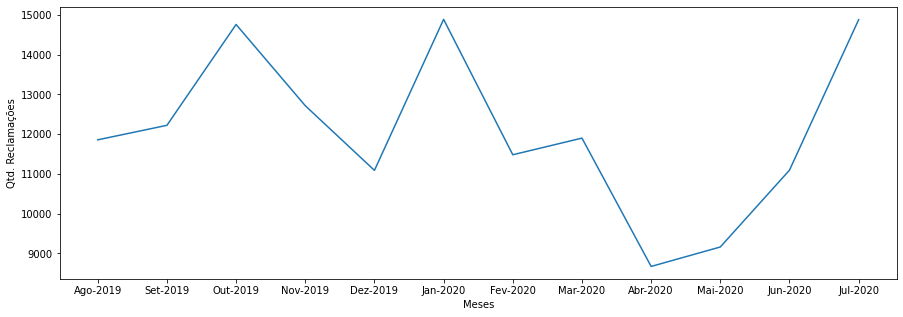

In [26]:
reclamacoes_por_mes = reclamacoes['mês-ano'].value_counts().reset_index()
reclamacoes_por_mes.columns = ['Meses', 'Qtd. Reclamações']
reclamacoes_por_mes = reclamacoes_por_mes.sort_values(by="Meses",ascending=True)

plt.figure(figsize=(15,5))
ax = sns.lineplot(x='Meses', y='Qtd. Reclamações', data=reclamacoes_por_mes)
ax.set_xticklabels(['Ago-2019','Set-2019','Out-2019','Nov-2019','Dez-2019','Jan-2020','Fev-2020','Mar-2020','Abr-2020','Mai-2020','Jun-2020','Jul-2020'])
plt.close(0)

<h4>Quais os temas de reclamações mais frequentes?<h4>

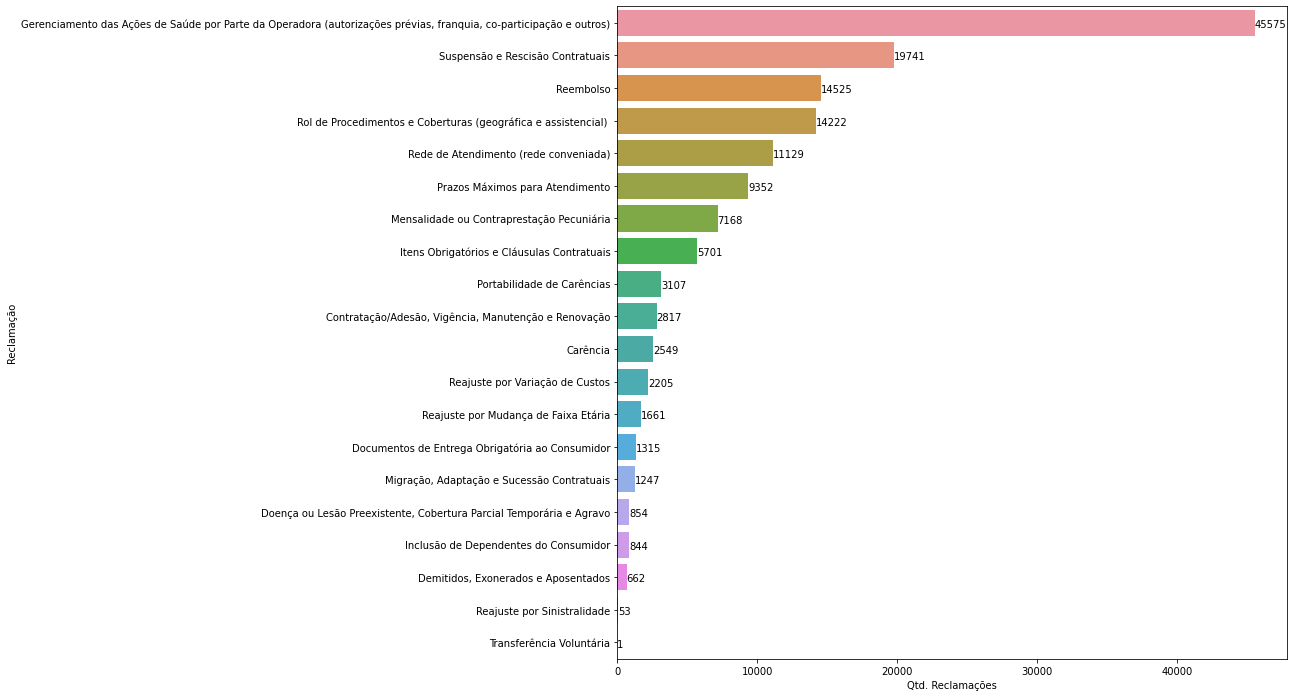

In [10]:
#rankeamento das reclamações

ranking_reclamacoes = reclamacoes['Subtema Demanda'].value_counts().reset_index()
ranking_reclamacoes.columns = ['Reclamação', 'Qtd. Reclamações']

plt.figure(figsize=(12,12))
ax = sns.barplot(x='Qtd. Reclamações', y='Reclamação', data=ranking_reclamacoes)
show_values_on_bars(ax, "h", 0.3, 1.5)

<h4>Quais planos de saúde tiveram mais reclamações?<h4>
<h5 style="margin-top: -20px;">*Em função da existência de grande quantidade de planos de saúde (899) foram considerados apenas os que respondem por aproximadamente 80% da quantidade total de reclamações (utilizando a metodologia de Pareto).*</h5>

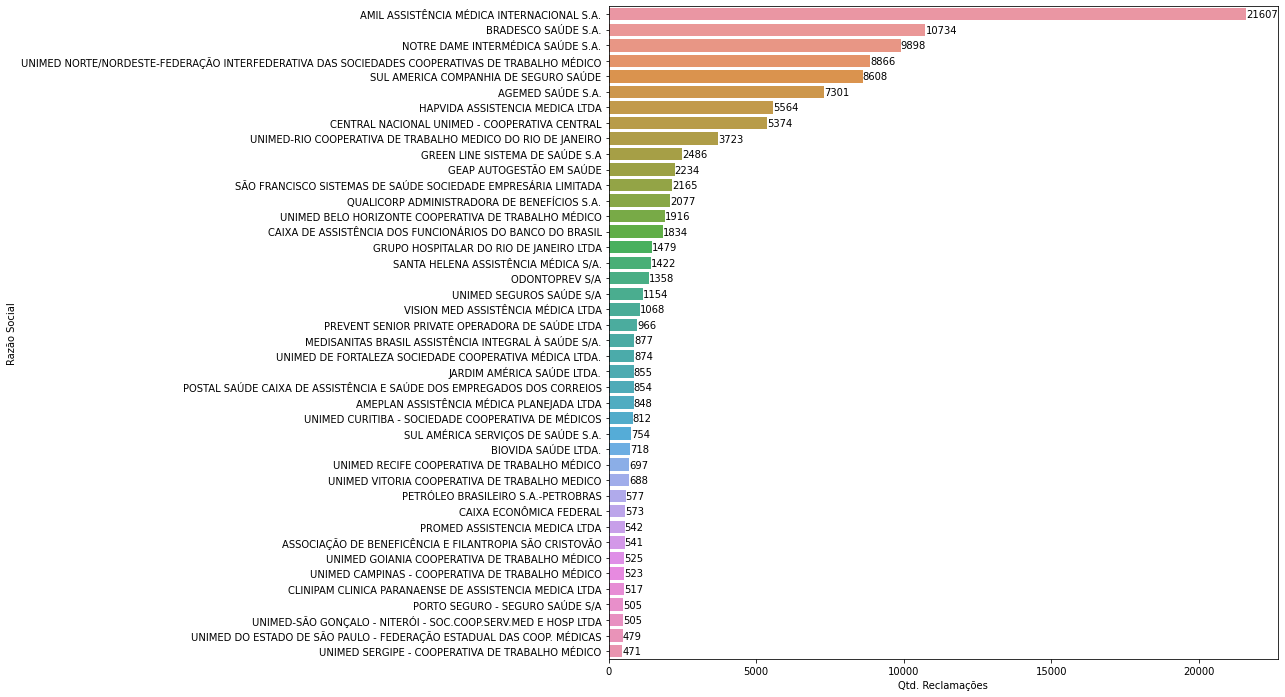

In [11]:
#Quais planos de saúde tiveram mais reclamações?
ranking_planos_reclamacoes = pd.DataFrame(reclamacoes['Razão Social'].value_counts().reset_index(),index=range(len(reclamacoes['Razão Social'].unique())))
ranking_planos_reclamacoes.columns = ['Razão Social','Qtd. Reclamações']
ranking_planos_reclamacoes['Qtd_Reclamações_Acumulado'] = ranking_planos_reclamacoes['Qtd. Reclamações'].cumsum()
ranking_planos_reclamacoes

qtd_80_20 =  ranking_planos_reclamacoes['Qtd. Reclamações'].sum() * 0.8

ranking_planos_reclamacoes_80_20 = ranking_planos_reclamacoes[ranking_planos_reclamacoes['Qtd_Reclamações_Acumulado'] <= qtd_80_20]

plt.figure(figsize=(12,12))
ax = sns.barplot(x='Qtd. Reclamações', y='Razão Social', data=ranking_planos_reclamacoes_80_20)
show_values_on_bars(ax, "h", 0.3,1.3)

In [28]:
#Quantidade de beneficiários por plano
planos_unicos = reclamacoes['Razão Social'].unique()
qtd_beneficiarios = []
datas = []
for plano in planos_unicos:
    subset = reclamacoes[reclamacoes['Razão Social'] == plano]
    data_recente = subset['Data Atendimento'].max()
    datas.append(data_recente)
    qtd_beneficiarios.append(int(subset[subset['Data Atendimento'] == data_recente]['Beneficiários'].values[0]))
    
beneficiarios_planos = {'Planos': planos_unicos,'Datas': datas, 'Beneficiários': qtd_beneficiarios}
beneficiarios_planos = pd.DataFrame(beneficiarios_planos, index=range(len(planos_unicos)))
beneficiarios_planos = beneficiarios_planos.sort_values(by="Beneficiários",ascending=False)
beneficiarios_planos

,Planos,Datas,Beneficiários
37,ODONTOPREV S/A,2020-07-31 16:56:36,6290145
0,NOTRE DAME INTERMÉDICA SAÚDE S.A.,2020-07-31 21:32:18,5542484
1,AMIL ASSISTÊNCIA MÉDICA INTERNACIONAL S.A.,2020-07-31 21:06:38,4949253
5,HAPVIDA ASSISTENCIA MEDICA LTDA,2020-07-31 17:38:58,4186628
2,BRADESCO SAÚDE S.A.,2020-07-31 18:20:40,3392966
...,...,...,...
119,ALL CARE ADMINISTRADORA DE BENEFÍCIOS SÃO PAUL...,2020-07-30 18:31:50,0
372,BENEVIX ADMINISTRADORA DE BENEFÍCIOS LTDA,2020-07-31 15:57:40,0
709,MÚLTIPLA ADMINISTRAÇÃO DE BENEFÍCIOS LTDA - ME,2020-04-29 13:18:57,0
368,ASSOCIAÇÃO PRÓ-SAÚDE,2020-03-10 17:30:26,0


<h4>Qual a quantidade de beneficiários dos planos com mais reclamações?</h4>

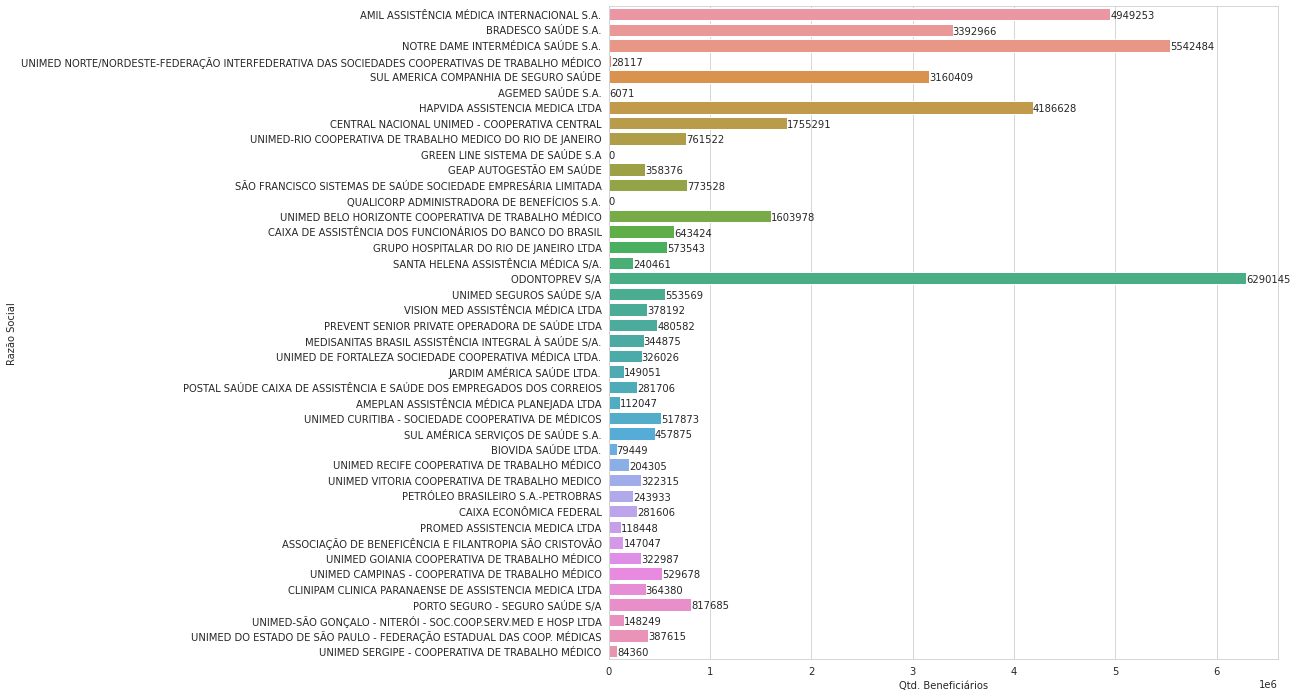

In [13]:
#Quantidade de beneficiários dos planos com mais reclamações

planos_mais_reclamacoes  = ranking_planos_reclamacoes_80_20['Razão Social'].unique()

planos_beneficiarios_reclamacoes = []
for plano in planos_mais_reclamacoes:
    planos_beneficiarios_reclamacoes.append(beneficiarios_planos[beneficiarios_planos['Planos'] == plano]['Beneficiários'].values[0])

ranking_planos_reclamacoes_80_20['Qtd. Beneficiários'] = planos_beneficiarios_reclamacoes 
ranking_planos_reclamacoes_80_20

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12,12))
    ax = sns.barplot(x='Qtd. Beneficiários', y='Razão Social', data=ranking_planos_reclamacoes_80_20)

    show_values_on_bars(ax, "h", 0.3,1.2)

<h4>Existe relação entre a quantidade de beneficiários e a quantidade de reclamações do mesmo?</h4>
<h5>Inicialmente, considerando todos os planos responsáveis em conjunto por 80% da quantidade total de reclamações, parece haver uma forte correlação positiva entre essas variáveis...</h5>

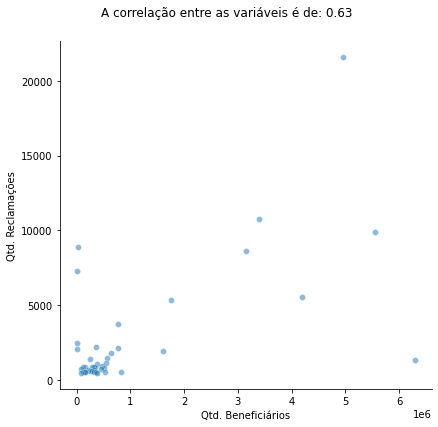

In [14]:
ax = sns.relplot(x="Qtd. Beneficiários", y="Qtd. Reclamações",
            alpha=.5, palette="muted",
            height=6, data=ranking_planos_reclamacoes_80_20)
ax.fig.subplots_adjust(top=0.9)
titulo = 'A correlação entre as variáveis é de: %.2f' % (ranking_planos_reclamacoes_80_20['Qtd. Beneficiários'].corr(ranking_planos_reclamacoes_80_20['Qtd. Reclamações']))
ax.fig.suptitle(titulo, fontsize=12)
plt.close(0)

<h5>Mas ao remover os planos com quantidade de beneficiários e/ou reclamações bem diferentes do "padrão" dos demais planos, percebe-se que essa correlação é bem menor na realidade.</h5>

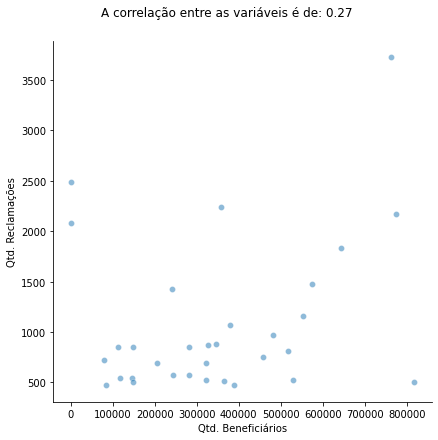

In [15]:
#removendo outliers utilizando método estatístico

ranking_planos_reclamacoes_80_20_atualizado  = ranking_planos_reclamacoes_80_20.drop(['Qtd_Reclamações_Acumulado'],axis=1)
Q1 = ranking_planos_reclamacoes_80_20_atualizado.quantile(0.25)
Q3 = ranking_planos_reclamacoes_80_20_atualizado.quantile(0.75)
IQR = Q3 - Q1

ranking_planos_reclamacoes_80_20_atualizado = ranking_planos_reclamacoes_80_20_atualizado[~((ranking_planos_reclamacoes_80_20_atualizado < (Q1 - 1.5 * IQR)) |(ranking_planos_reclamacoes_80_20_atualizado > (Q3 + 1.5 * IQR))).any(axis=1)]

ax = sns.relplot(x="Qtd. Beneficiários", y="Qtd. Reclamações",
            alpha=.5, palette="muted",
            height=6, data=ranking_planos_reclamacoes_80_20_atualizado)
ax.fig.subplots_adjust(top=0.9)
titulo = 'A correlação entre as variáveis é de: %.2f' % (ranking_planos_reclamacoes_80_20_atualizado['Qtd. Beneficiários'].corr(ranking_planos_reclamacoes_80_20_atualizado['Qtd. Reclamações']))
ax.fig.suptitle(titulo, fontsize=12)
plt.close(0)

<h4>Quais as 50 datas mais recorrentes nas reclamações?</h4>

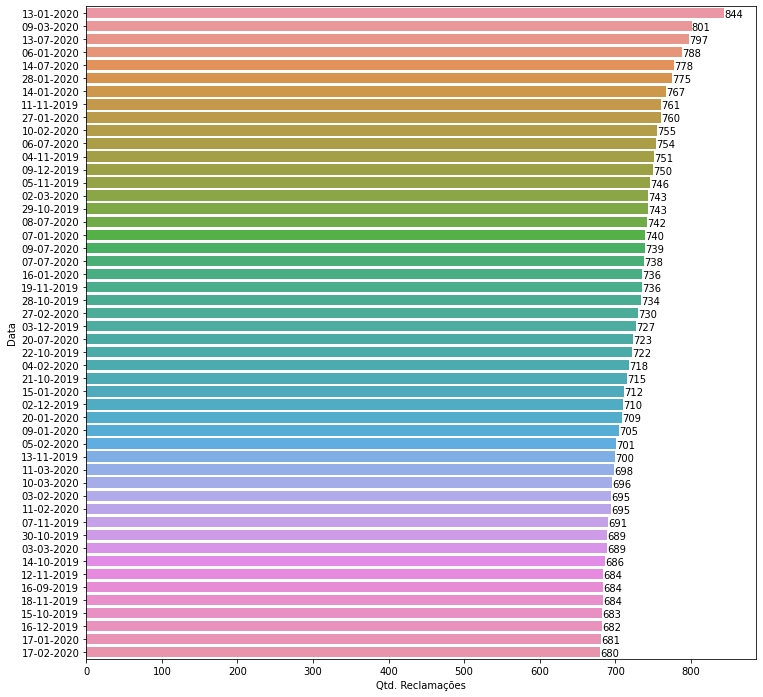

In [16]:
#As datas mais recorrentes que aparecem nas reclamações
ranking_datas_reclamacoes = pd.DataFrame(reclamacoes['Data'].value_counts().reset_index(),index=range(len(reclamacoes['Data'].unique())))
ranking_datas_reclamacoes.columns = ['Data','Qtd. Reclamações']
ranking_datas_reclamacoes['Data'] = ranking_datas_reclamacoes['Data'].astype(str)

sns.axes_style("ticks")
plt.figure(figsize=(12,12))
ax = sns.barplot(y='Data',x="Qtd. Reclamações", data=ranking_datas_reclamacoes.head(50))
show_values_on_bars(ax, "h", 0.3,1.1)

<h4>Ocorrem mais reclamações em qual quinzena do mês?</h4>
<h5>Há uma alternância entre a predominância de ocorrências em cada quinzena do mês, pois existem 6 meses com mais reclamações na 1ª quinzena e 6 meses com mais reclamações na 2ª quinzena.</h5>

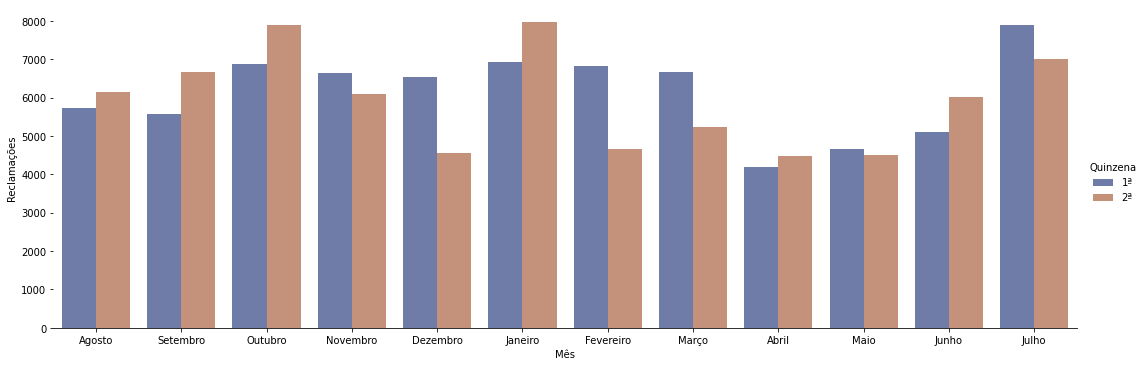

In [17]:
#Quantidade de reclamações por quinzena do mês

resumo = []
for mes in reclamacoes['mês_extenso'].unique():
    for x in range(2):
        linha = [mes]
        subset = reclamacoes[reclamacoes['mês_extenso'] == mes]
        linha.append(str((x+1)) + "ª")
        linha.append(len(subset[subset['quinzena'] == (x+1)]))
        resumo.append(linha)
relamacoes_por_quinzena = pd.DataFrame(resumo, index=range(len(resumo)))
relamacoes_por_quinzena.columns = ['Mês', 'Quinzena', "Reclamações"]

ax = sns.catplot(
    data=relamacoes_por_quinzena, kind="bar",
    x="Mês", y="Reclamações",
    hue="Quinzena",
 palette="dark", alpha=.6,aspect=3,
)
ax.despine(left=True)
plt.close(0)

<h5>Embora ocorram mais reclamações na 1ª quinzena, em números absolutos.</h5>

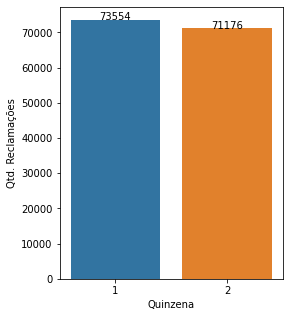

In [18]:
reclamacoes_quinzena_1 = reclamacoes['quinzena'].value_counts().reset_index()
reclamacoes_quinzena_1.columns = ['Quinzena', 'Qtd. Reclamações']

plt.figure(figsize=(4,5))
ax = sns.barplot(y='Qtd. Reclamações',x="Quinzena", data=reclamacoes_quinzena_1)
show_values_on_bars(ax, "v", 0.3,1.1)

<h4>Ocorrem mais reclamações em qual semana do mês?</h4>
<h5>Em concordância com a constatação citada acima, também ocorre alternancia entre a predominacia de reclamações nas semanas iniciais e finais dos meses.</h5>

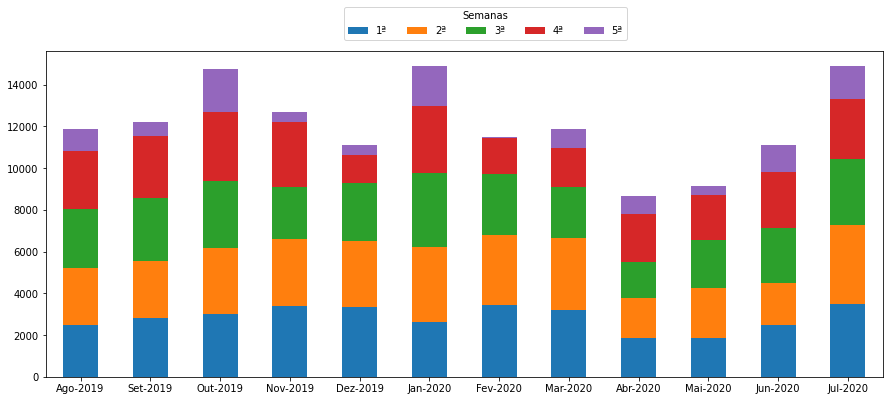

In [19]:
#Quantidade de reclamações por semana do mês

resumo = []
for semana in reclamacoes['parte_semana'].unique():
    semanas = [str(semana) + "ª"]
    for mes in reclamacoes['mês-ano'].unique():
        subset = reclamacoes[reclamacoes['mês-ano'] == mes]
        semanas.append(len(subset[subset['parte_semana'] == semana]))
    resumo.append(semanas)

reclamacoes_quinzena = pd.DataFrame(columns=["Semana",'Ago-2019','Set-2019','Out-2019','Nov-2019','Dez-2019','Jan-2020','Fev-2020','Mar-2020','Abr-2020','Mai-2020','Jun-2020','Jul-2020'], 
                  data=resumo)

ax = reclamacoes_quinzena.set_index('Semana').T.plot(kind='bar', stacked=True, figsize=(15,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
ax.legend(title='Semanas',bbox_to_anchor =(.7, 1.15), ncol = 5,loc=0)
plt.close(0)

<h4>Ocorrem mais reclamações em quais dias da semana?</h4>
<h5>É possível identificar uma concentração das reclamações nos 4 primeiros dias da semana (Seg à Quinta)...</h5>

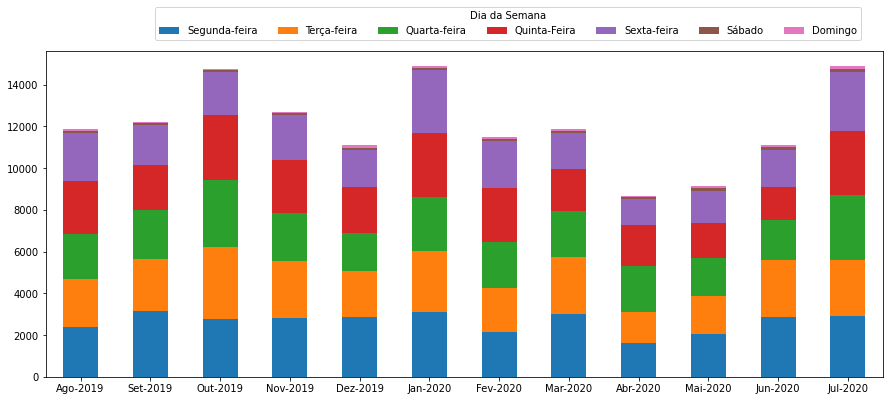

In [20]:
#Quantidade de reclamações por dia da semana
resumo = []
for dia in DIAS:
    dias = [str(dia)]
    for mes in reclamacoes['mês-ano'].unique():
        subset = reclamacoes[reclamacoes['mês-ano'] == mes]
        dias.append(len(subset[subset['dia_semana'] == dia]))
    resumo.append(dias)

reclamacoes_dia_semana = pd.DataFrame(columns=["Dia da Semana",'Ago-2019','Set-2019','Out-2019','Nov-2019','Dez-2019','Jan-2020','Fev-2020','Mar-2020','Abr-2020','Mai-2020','Jun-2020','Jul-2020'], 
                  data=resumo)

ax = reclamacoes_dia_semana.set_index('Dia da Semana').T.plot(kind='bar', stacked=True, figsize=(15,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=360)
ax.legend(title='Dia da Semana',bbox_to_anchor =(.98, 1.15), ncol = 7,loc=0)
plt.close(0)

<h5>Como melhor evidênciado no gráfico abaixo.</h5>

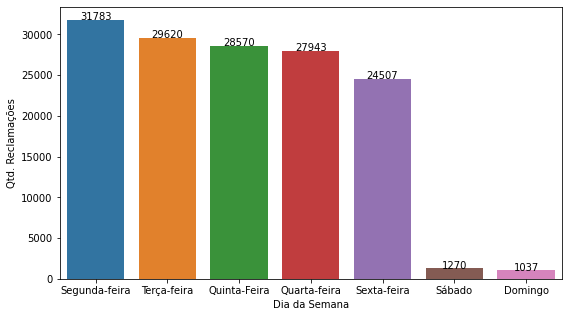

In [21]:
reclamacoes_dia_semana1 = reclamacoes['dia_semana'].value_counts().reset_index()
reclamacoes_dia_semana1.columns = ['Dia da Semana', 'Qtd. Reclamações']

plt.figure(figsize=(9,5))
ax = sns.barplot(y='Qtd. Reclamações',x="Dia da Semana", data=reclamacoes_dia_semana1)
show_values_on_bars(ax, "v", 0.3,1.1)

<h4>Ocorrem mais reclamações em quais horários do dia?</h4>
<h5>É possível identificar maior concentração de reclamações no horário entre as 9h e 17h com leve redução durante o horário de almoço (entre as 12h e 13h).</h5>

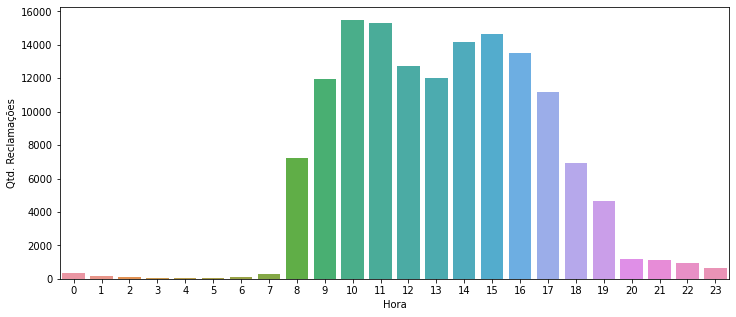

In [22]:
reclamações_por_horario = reclamacoes['Hora'].value_counts().reset_index().sort_values(by="index")
reclamações_por_horario.columns = ['Hora','Qtd. Reclamações']
plt.figure(figsize=(12,5))
ax = sns.barplot(y='Qtd. Reclamações',x="Hora", data=reclamações_por_horario)